In [1]:
# Importing required libraries
import requests
import json
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from adjustText import adjust_text  # Library for text labels adjustment

### Fetching Json from API

In [2]:
# Step 1: Fetch JSON data
# prize
response1 = requests.get("https://api.nobelprize.org/v1/prize.json")
data1 = response1.json()
# laureate
response2 = requests.get("https://api.nobelprize.org/v1/laureate.json")
data2 = response2.json()

In [3]:
# Step 2: Parse JSON data
prize_data = data1['prizes']
laureate_data = data2['laureates']

In [4]:
# print(prize_data)

In [5]:
# print(laureate_data)

In [6]:
# Read the JSON file
with open('prize_data.json') as f:
    prize_data = json.load(f)
# Read the JSON file
with open('laureate_data.json') as f:
    laureate_data = json.load(f)

### Saving the Json file to local

In [7]:
# # Write prize data to JSON file
# with open('prize_data.json', 'w') as file:
#     json.dump(prize_data, file, indent=4)

# # Write laureate data to JSON file
# with open('laureate_data.json', 'w') as file:
#     json.dump(laureate_data, file, indent=4)

### Creating SQLite Database

In [8]:
# Step 3: Create SQLite database schema
conn = sqlite3.connect('nobel_prizes.db')
cursor = conn.cursor()

### Creating Laureates table

In [9]:
# Step 4: Create database tables

# Create Laureates table
cursor.execute('''CREATE TABLE IF NOT EXISTS Laureates (
               id INTEGER PRIMARY KEY,
               firstname TEXT,
               surname TEXT,
               born DATE,
               died DATE,
               bornCountry TEXT,
               bornCountryCode TEXT,
               bornCity TEXT,
               diedCountry TEXT,
               diedCountryCode TEXT,
               diedCity TEXT,
               gender TEXT,
               affliation_id INTEGER
               )''')

### Inserting Values into Laureates table

In [10]:
for laureate in laureate_data:
    cursor.execute('''INSERT INTO Laureates VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?,?)''', 
                (laureate['id'],
                 laureate.get('firstname', None),
                 laureate.get('surname', None),
                 laureate.get('born', None),
                 laureate.get('died', None),
                 laureate.get('bornCountry', None),
                 laureate.get('bornCountryCode', None),
                 laureate.get('bornCity', None),
                 laureate.get('diedCountry', None),
                 laureate.get('diedCountryCode', None),
                 laureate.get('diedCity', None),
                 laureate.get('gender', None),
                None))

### SQL query to view Laureates table

In [11]:
# Execute SQL query to select all rows from Prizes table
cursor.execute('''SELECT * FROM Laureates''')

# Fetch all rows
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 'Wilhelm Conrad', 'Röntgen', '1845-03-27', '1923-02-10', 'Prussia (now Germany)', 'DE', 'Lennep (now Remscheid)', 'Germany', 'DE', 'Munich', 'male', None)
(2, 'Hendrik A.', 'Lorentz', '1853-07-18', '1928-02-04', 'the Netherlands', 'NL', 'Arnhem', 'the Netherlands', 'NL', None, 'male', None)
(3, 'Pieter', 'Zeeman', '1865-05-25', '1943-10-09', 'the Netherlands', 'NL', 'Zonnemaire', 'the Netherlands', 'NL', 'Amsterdam', 'male', None)
(4, 'Henri', 'Becquerel', '1852-12-15', '1908-08-25', 'France', 'FR', 'Paris', 'France', 'FR', None, 'male', None)
(5, 'Pierre', 'Curie', '1859-05-15', '1906-04-19', 'France', 'FR', 'Paris', 'France', 'FR', 'Paris', 'male', None)
(6, 'Marie', 'Curie', '1867-11-07', '1934-07-04', 'Russian Empire (now Poland)', 'PL', 'Warsaw', 'France', 'FR', 'Sallanches', 'female', None)
(8, 'Lord', 'Rayleigh', '1842-11-12', '1919-06-30', 'United Kingdom', 'GB', 'Langford Grove, Maldon, Essex', 'United Kingdom', 'GB', None, 'male', None)
(9, 'Philipp', 'Lenard', '1862-06-0

### Creating Affiliations table

In [12]:
# Create Affiliations table
cursor.execute('''CREATE TABLE Affiliations (
               id INTEGER PRIMARY KEY AUTOINCREMENT,
               name TEXT,
               city TEXT,
               country TEXT
               )''')

### Inserting Values into Affiliations table

In [13]:
# Access and print affiliations
for item in laureate_data:
    for prize in item.get('prizes', []):
        affiliations = prize.get("affiliations", [])
        for affiliation in affiliations:
            print(affiliation)

{'name': 'Munich University', 'city': 'Munich', 'country': 'Germany'}
{'name': 'Leiden University', 'city': 'Leiden', 'country': 'the Netherlands'}
{'name': 'Amsterdam University', 'city': 'Amsterdam', 'country': 'the Netherlands'}
{'name': 'École Polytechnique', 'city': 'Paris', 'country': 'France'}
{'name': 'École municipale de physique et de chimie industrielles (Municipal School of Industrial Physics and Chemistry)', 'city': 'Paris', 'country': 'France'}
[]
{'name': 'Sorbonne University', 'city': 'Paris', 'country': 'France'}
{'name': 'Royal Institution of Great Britain', 'city': 'London', 'country': 'United Kingdom'}
{'name': 'Kiel University', 'city': 'Kiel', 'country': 'Germany'}
{'name': 'University of Cambridge', 'city': 'Cambridge', 'country': 'United Kingdom'}
{'name': 'University of Chicago', 'city': 'Chicago, IL', 'country': 'USA'}
{'name': 'Sorbonne University', 'city': 'Paris', 'country': 'France'}
{'name': 'Marconi Wireless Telegraph Co. Ltd.', 'city': 'London', 'countr

In [14]:
# Access and print unique affiliations
unique_affiliations = set()

for item in laureate_data:
    for prize in item.get('prizes', []):
        affiliations = prize.get("affiliations", [])
        for affiliation in affiliations:
            if affiliation:  # Check if affiliation is not None
                affiliation_tuple = tuple(affiliation.items())
                unique_affiliations.add(affiliation_tuple)

for affiliation_tuple in unique_affiliations:
    affiliation_dict = dict(affiliation_tuple)
    print(affiliation_dict if affiliation_dict else "None")

{'name': 'University of Texas Southwestern Medical Center at Dallas', 'city': 'Dallas, TX', 'country': 'USA'}
{'name': 'Mainz University', 'city': 'Mainz', 'country': 'Germany'}
{'name': 'Lomonosov Moscow State University', 'city': 'Moscow', 'country': 'USSR (now Russia)'}
{'name': 'Brown University', 'city': 'Providence, RI', 'country': 'USA'}
{'name': 'Nordita', 'city': 'Copenhagen', 'country': 'Denmark'}
{'name': 'University of Texas MD Anderson Cancer Center', 'city': 'Houston, TX', 'country': 'USA'}
{'name': 'Stockholm School of Economics', 'city': 'Stockholm', 'country': 'Sweden'}
{'name': 'University of California', 'city': 'Santa Barbara, CA', 'country': 'USA'}
{'name': 'University of Delaware', 'country': 'USA'}
{'name': 'New York University', 'city': 'New York, NY', 'country': 'USA'}
{'name': 'Rowett Research Institute', 'city': 'Bucksburn (Scotland)', 'country': 'United Kingdom'}
{'name': 'Asahi Kasei Corporation', 'city': 'Tokyo', 'country': 'Japan'}
{'name': 'University of

In [15]:
# Access and print unique affiliations
unique_affiliations = set()

for item in laureate_data:
    for prize in item.get('prizes', []):
        affiliations = prize.get("affiliations", [])
        if not affiliations:  # Handle the case where there are no affiliations
            unique_affiliations.add(None)
        else:
            for affiliation in affiliations:
                if affiliation:  # Check if affiliation is not empty
                    affiliation_tuple = tuple(affiliation.items())
                    unique_affiliations.add(affiliation_tuple)
                else:
                    unique_affiliations.add(None)

# Insert unique affiliations into the Affiliations table
for affiliation in unique_affiliations:
    if affiliation is None:
        # Optionally handle the None case if you want to insert unknown entries
        cursor.execute("INSERT INTO Affiliations (name, city, country) VALUES (?, ?, ?)", ('Unknown', None, None))
    else:
        affiliation_dict = dict(affiliation)
        # Extract values or use None if the key does not exist
        name = affiliation_dict.get('name', None)
        city = affiliation_dict.get('city', None)
        country = affiliation_dict.get('country', None)
        # Execute SQL command
        cursor.execute("INSERT INTO Affiliations (name, city, country) VALUES (?, ?, ?)", (name, city, country))

In [16]:
# Define the values to insert
name = 'Unknown'
city = 'Unknown'
country = 'Unknown'

# Execute SQL query to insert a row
cursor.execute('''
    INSERT INTO Affiliations (name, city, country)
    VALUES (?, ?, ?)
''', (name, city, country))

# Print a confirmation message
print("Row added successfully.")

Row added successfully.


### SQL query to view Affiliations table

In [17]:
# Execute SQL query to select all rows from Prizes table
cursor.execute('''SELECT * FROM Affiliations ORDER BY id ''')

# Fetch all rows
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 'University of Texas Southwestern Medical Center at Dallas', 'Dallas, TX', 'USA')
(2, 'Mainz University', 'Mainz', 'Germany')
(3, 'Lomonosov Moscow State University', 'Moscow', 'USSR (now Russia)')
(4, 'Brown University', 'Providence, RI', 'USA')
(5, 'Nordita', 'Copenhagen', 'Denmark')
(6, 'University of Texas MD Anderson Cancer Center', 'Houston, TX', 'USA')
(7, 'Stockholm School of Economics', 'Stockholm', 'Sweden')
(8, 'University of California', 'Santa Barbara, CA', 'USA')
(9, 'University of Delaware', None, 'USA')
(10, 'New York University', 'New York, NY', 'USA')
(11, 'Rowett Research Institute', 'Bucksburn (Scotland)', 'United Kingdom')
(12, 'Asahi Kasei Corporation', 'Tokyo', 'Japan')
(13, 'University of Alberta', 'Edmonton', 'Canada')
(14, 'London School of Economics and Political Science', 'London', 'United Kingdom')
(15, 'Yale University, School of Medicine', 'New Haven, CT', 'USA')
(16, 'General Electric Company', 'Schenectady, NY', 'USA')
(17, 'University of Cambridge'

### Creating Prize table

In [18]:
# Create Prizes table
cursor.execute('''CREATE TABLE Prizes (
               id INTEGER PRIMARY KEY AUTOINCREMENT,
               year INTEGER,
               category TEXT,
               share INTEGER,
               motivation TEXT,
               laureate_id1 INTEGER,
               laureate_id1_gender TEXT,
               laureate_id2 INTEGER,
               laureate_id2_gender TEXT,
               laureate_id3 INTEGER,
               laureate_id3_gender TEXT
               )''')

### Inserting Values into Prize table

In [19]:
# Access and print prize
for prize in prize_data:
    prize_id = cursor.lastrowid
    year=prize.get('year', None)
    category=prize.get('category', None)
    pairs_to_match = {'year': year,'category':category}
    for item in laureate_data:
        for prize in item.get('prizes', []):
            if all(prize.get(key) == value for key, value in pairs_to_match.items()):
                new_prize=prize
                break
    share=new_prize.get('share',None)
    motivation=new_prize.get('motivation','None')
    print(year,category,share,motivation)
    cursor.execute("INSERT INTO Prizes (year, category, share,motivation) VALUES (?, ?, ?,?)", (year, category, share,motivation))

2023 chemistry 3 "for the discovery and synthesis of quantum dots"
2023 economics 1 "for having advanced our understanding of women’s labour market outcomes"
2023 literature 1 "for his innovative plays and prose which give voice to the unsayable"
2023 peace 1 "for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"
2023 physics 3 "for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"
2023 medicine 2 "for their discoveries concerning nucleoside base modifications that enabled the development of effective mRNA vaccines against COVID-19"
2022 chemistry 3 "for the development of click chemistry and bioorthogonal chemistry"
2022 economics 3 "for research on banks and financial crises"
2022 literature 1 "for the courage and clinical acuity with which she uncovers the roots, estrangements and  collective restraints of personal memory"
2022 peace 3 "The Peace Prize laureates repre

2010 medicine 1 "for the development of in vitro fertilization"
2009 chemistry 3 "for studies of the structure and function of the ribosome"
2009 economics 2 "for his analysis of economic governance, especially the boundaries of the firm"
2009 literature 1 "who, with the concentration of poetry and the frankness of prose, depicts the landscape of the dispossessed"
2009 peace 1 "for his extraordinary efforts to strengthen international diplomacy and cooperation between peoples"
2009 physics 4 "for the invention of an imaging semiconductor circuit - the CCD sensor"
2009 medicine 3 "for the discovery of how chromosomes are protected by telomeres and the enzyme telomerase"
2008 chemistry 3 "for the discovery and development of the green fluorescent protein, GFP"
2008 economics 1 "for his analysis of trade patterns and location of economic activity"
2008 literature 1 "author of new departures, poetic adventure and sensual ecstasy, explorer of a humanity beyond and below the reigning civiliz

1996 physics 3 "for their discovery of superfluidity in helium-3"
1996 medicine 2 "for their discoveries concerning the specificity of the cell mediated immune defence"
1995 chemistry 3 "for their work in atmospheric chemistry, particularly concerning the formation and decomposition of ozone"
1995 economics 1 "for having developed and applied the hypothesis of rational expectations, and thereby having transformed macroeconomic analysis and deepened our understanding of economic policy"
1995 literature 1 "for works of lyrical beauty and ethical depth, which exalt everyday miracles and the living past"
1995 peace 2 "for their efforts to diminish the part played by nuclear arms in international politics and, in the longer run, to eliminate such arms"
1995 physics 2 "for the detection of the neutrino"
1995 medicine 3 "for their discoveries concerning the genetic control of early embryonic development"
1994 chemistry 1 "for his contribution to carbocation chemistry"
1994 economics 3 "for th

1983 economics 1 "for having incorporated new analytical methods into economic theory and for his rigorous reformulation of the theory of general equilibrium"
1983 literature 1 "for his novels which, with the perspicuity of realistic narrative art and the diversity and universality of myth, illuminate the human condition in the world of today"
1983 peace 1 "for non-violent struggle for free trade unions and human rights in Poland"
1983 physics 2 "for his theoretical and experimental studies of the nuclear reactions of importance in the formation of the chemical elements in the universe"
1983 medicine 1 "for her discovery of mobile genetic elements"
1982 chemistry 1 "for his development of crystallographic electron microscopy and his structural elucidation of biologically important nucleic acid-protein complexes"
1982 economics 1 "for his seminal studies of industrial structures, functioning of markets and causes and effects of public regulation"
1982 literature 1 "for his novels and sh

1970 medicine 3 "for their discoveries concerning the humoral transmitters in the nerve terminals and the mechanism for their storage, release and inactivation"
1969 chemistry 2 "for their contributions to the development of the concept of conformation and its application in chemistry"
1969 economics 2 "for having developed and applied dynamic models for the analysis of economic processes"
1969 literature 1 "for his writing, which - in new forms for the novel and drama - in the destitution of modern man acquires its elevation"
1969 peace 1 "for creating international legislation insuring certain norms for working conditions in every country"
1969 physics 1 "for his contributions and discoveries concerning the classification of elementary particles and their interactions"
1969 medicine 3 "for their discoveries concerning the replication mechanism and the genetic structure of viruses"
1968 chemistry 1 "for the discovery of the reciprocal relations bearing his name, which are fundamental 

1956 physics 3 "for their researches on semiconductors and their discovery of the transistor effect"
1956 medicine 3 "for their discoveries concerning heart catheterization and pathological changes in the circulatory system"
1955 chemistry 1 "for his work on biochemically important sulphur compounds, especially for the first synthesis of a polypeptide hormone"
1955 literature 1 "for his vivid epic power which has renewed the great narrative art of Iceland"
1955 peace 1 "for his vivid epic power which has renewed the great narrative art of Iceland"
1955 physics 2 "for his precision determination of the magnetic moment of the electron"
1955 medicine 1 "for his discoveries concerning the nature and mode of action of oxidation enzymes"
1954 chemistry 1 "for his research into the nature of the chemical bond and its application to the elucidation of the structure of complex substances"
1954 literature 1 "for his mastery of the art of narrative, most recently demonstrated in <I>The Old Man an

1940 literature 2 "for his discovery of the chemical nature of vitamin K"
1940 peace 2 "for his discovery of the chemical nature of vitamin K"
1940 physics 2 "for his discovery of the chemical nature of vitamin K"
1940 medicine 2 "for his discovery of the chemical nature of vitamin K"
1939 chemistry 2 "for his work on polymethylenes and higher terpenes"
1939 literature 1 "for his deep understanding of his country's peasantry and the exquisite art with which he has portrayed their way of life and their relationship with Nature"
1939 peace 1 "for his deep understanding of his country's peasantry and the exquisite art with which he has portrayed their way of life and their relationship with Nature"
1939 physics 1 "for the invention and development of the cyclotron and for results obtained with it, especially with regard to artificial radioactive elements"
1939 medicine 1 "for the discovery of the antibacterial effects of prontosil"
1938 chemistry 1 "for his work on carotenoids and vitamin

1920 chemistry 1 "in recognition of his work in thermochemistry"
1920 literature 1 "for his monumental work, <I>Growth of the Soil</I>"
1920 peace 1 "for his longstanding contribution to the cause of peace and justice and his prominent role in the establishment of the League of Nations"
1920 physics 1 "in recognition of the service he has rendered to precision measurements in Physics by his discovery of anomalies in nickel steel alloys"
1920 medicine 1 "for his discovery of the capillary motor regulating mechanism"
1919 chemistry 1 "for his discovery of the capillary motor regulating mechanism"
1919 literature 1 "in special appreciation of his epic, <I>Olympian Spring</I>"
1919 peace 1 "for his role as founder of the League of Nations"
1919 physics 1 "for his discovery of the Doppler effect in canal rays and the splitting of spectral lines in electric fields"
1919 medicine 1 "for his discoveries relating to immunity"
1918 chemistry 1 "for the synthesis of ammonia from its elements"
191

1904 peace 1 "for its striving in public law to develop peaceful ties between nations and to make the laws of war more humane"
1904 physics 1 "for his investigations of the densities of the most important gases and for his discovery of argon in connection with these studies"
1904 medicine 1 "in recognition of his work on the physiology of digestion, through which knowledge on vital aspects of the subject has been transformed and enlarged"
1903 chemistry 1 "in recognition of the extraordinary services he has rendered to the advancement of chemistry by his electrolytic theory of dissociation"
1903 literature 1 "as a tribute to his noble, magnificent and versatile poetry, which has always been distinguished by both the freshness of its inspiration and the rare purity of its spirit"
1903 peace 1 "for his longstanding and devoted effort in favour of the ideas of peace and arbitration"
1903 physics 4 "in recognition of the extraordinary services they have rendered by their joint researches o

### SQL query to view Prizes table

In [20]:
# Execute SQL query to select all rows from Prizes table
cursor.execute('''SELECT * FROM Prizes''')

# Fetch all rows
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', None, None, None, None, None, None)
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', None, None, None, None, None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', None, None, None, None, None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', None, None, None, None, None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"', None, None, None, None, None, None)
(6, 2023, 'medicine', 2, '"for their discoveries concerning nucleoside base modifications that enabled the development of effective mRNA vaccines against COVID-19"', None, None, None, None, None, None)
(7, 2022, 'chemistry', 3, '"for the development of click

In [21]:
# Assume laureate_data is a list of laureate dictionaries
default_affiliation_id = 372  # ID for 'Unknown', 'Unknown', 'Unknown' entry in Affiliations table

for item in laureate_data:
    item_id = item.get('id')
    has_valid_affiliation = False  # Flag to check if any valid affiliations exist

    for prize in item.get('prizes', []):
        affiliations = prize.get("affiliations", [])
        
        for affiliation in affiliations:
            if affiliation:
                name = affiliation.get('name')
                country = affiliation.get('country')
                city = affiliation.get('city')

                # Check if the extracted details are not None
                if name and country and city:
                    has_valid_affiliation = True
                    cursor.execute('''SELECT id FROM Affiliations WHERE name=? AND country=? AND city=?''', (name, country, city))
                    rows = cursor.fetchall()
                    if rows:
                        aff_id = rows[0][0]
                        break  # Exit after the first valid affiliation found

        # If a valid affiliation ID was found, update the database
        if has_valid_affiliation:
            print(aff_id)  # Optional: Print the affiliation ID found
            cursor.execute('''UPDATE Laureates SET affliation_id=? WHERE id=?''', (aff_id, item_id))
            conn.commit()
            break  # No need to look further if a valid affiliation is found

    # If no valid affiliations were found, use the default affiliation ID
    if not has_valid_affiliation:
        print(default_affiliation_id)  # Optional: Print the default affiliation ID
        cursor.execute('''UPDATE Laureates SET affliation_id=? WHERE id=?''', (default_affiliation_id, item_id))

336
226
314
329
85
150
63
321
17
280
150
110
100
314
363
285
226
177
37
57
49
365
105
315
253
335
198
166
331
364
150
280
17
22
86
41
235
365
17
322
305
198
147
22
18
79
159
101
334
162
346
57
101
69
367
207
252
162
232
49
349
252
101
51
164
171
117
101
191
3
79
79
79
252
236
75
334
266
349
330
191
191
173
162
198
216
370
79
198
151
93
52
4
149
27
16
17
17
17
180
5
101
192
330
171
17
162
75
254
254
302
108
162
280
334
162
252
166
370
280
198
284
284
64
278
197
197
197
197
34
282
284
162
301
186
330
330
252
84
53
334
334
124
330
252
182
370
252
370
252
84
96
252
101
334
172
372
365
365
263
37
336
150
204
57
235
331
283
20
114
162
115
264
365
362
17
116
331
166
336
331
22
263
337
349
349
16
101
231
231
365
168
114
178
185
109
263
115
237
370
270
270
362
166
79
321
137
79
79
133
11
92
198
370
362
228
17
17
333
223
79
230
230
157
368
202
162
280
58
113
63
42
52
154
271
106
238
65
65
236
52
252
291
109
162
320
89
119
349
252
54
169
370
230
252
65
276
208
162
79
76
223
286
227
1
43
212
42
35

In [22]:
for item in prize_data:
    year = item.get('year', None)
    category = item.get('category', None)
    laureates = item.get('laureates', [])
    
    # Fetch laureate IDs and genders from Laureates table
    laureate_info = []
    for laureate in laureates:
        laureate_id = laureate.get('id', None)
        if laureate_id:
            cursor.execute("SELECT gender FROM Laureates WHERE id=?", (laureate_id,))
            result = cursor.fetchone()
            if result:
                laureate_gender = result[0]
            else:
                laureate_gender = None
            laureate_info.append((laureate_id, laureate_gender))
    
    # Update Prizes table with laureate IDs and genders
    for i, info in enumerate(laureate_info, start=1):
        laureate_id, laureate_gender = info
        if i == 1:
            cursor.execute('''UPDATE Prizes SET laureate_id1=?, laureate_id1_gender=? WHERE year=? AND category=?''', (laureate_id, laureate_gender, year, category))
        elif i == 2:
            cursor.execute('''UPDATE Prizes SET laureate_id2=?, laureate_id2_gender=? WHERE year=? AND category=?''', (laureate_id, laureate_gender, year, category))
        elif i == 3:
            cursor.execute('''UPDATE Prizes SET laureate_id3=?, laureate_id3_gender=? WHERE year=? AND category=?''', (laureate_id, laureate_gender, year, category))


In [23]:
# Execute SQL query to select all rows from Prizes table
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')

# Fetch all rows
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male')
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', 1033, 'female', None, None, None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"', 1026, 'male', 1027, 'male', 1028, 'female')


#### Add a new column Age to the Prizes table

In [24]:
# Add a new column Age to the Prizes table
cursor.execute('''ALTER TABLE Prizes ADD COLUMN Age_Laureate1 INTEGER''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN Age_Laureate2 INTEGER''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN Age_Laureate3 INTEGER''')

# Calculate age for each laureate and update the Age columns
cursor.execute('''UPDATE Prizes 
                  SET Age_Laureate1 = (SELECT year - strftime('%Y', born) 
                              FROM Laureates 
                              WHERE Prizes.laureate_id1 = Laureates.id),
                      Age_Laureate2 = (SELECT year - strftime('%Y', born) 
                              FROM Laureates 
                              WHERE Prizes.laureate_id2 = Laureates.id),
                      Age_Laureate3 = (SELECT year - strftime('%Y', born) 
                              FROM Laureates 
                              WHERE Prizes.laureate_id3 = Laureates.id)''')
# Execute a query to select top 5 records to verify the addition of the Age column
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')

# Fetch and print the results
rows = cursor.fetchall()
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male', None, None, None)
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None, None, None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None, 64, None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', 1033, 'female', None, None, None, None, 51, None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"', 1026, 'male', 1027, 'male', 1028, 'female', 82, 61, 65)


#### Add new columns for the Birth Country to the Prizes table

In [25]:
# Add new columns for the birth country of each laureate ID to the Prizes table
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id1_bornCountry TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id2_bornCountry TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id3_bornCountry TEXT''')

# Update the born country of each laureate into the prize table
cursor.execute('''
    UPDATE Prizes
    SET laureate_id1_bornCountry = (SELECT bornCountry FROM Laureates WHERE Prizes.laureate_id1 = Laureates.id),
        laureate_id2_bornCountry = (SELECT bornCountry FROM Laureates WHERE Prizes.laureate_id2 = Laureates.id),
        laureate_id3_bornCountry = (SELECT bornCountry FROM Laureates WHERE Prizes.laureate_id3 = Laureates.id)
''')

# Execute a query to select top 5 records to verify the addition of the Age column
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')

# Fetch and print the results
rows = cursor.fetchall()
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male', None, None, None, 'France', 'USA', 'USSR (now Russia)')
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None, None, None, None, 'USA', None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None, 64, None, None, 'Norway', None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', 1033, 'female', None, None, None, None, 51, None, None, 'Iran', None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter"', 1026, 'male', 1027, 'male', 1028, 'female', 82, 61, 65, 'French protectorate of Tunisia (now Tunisia)', 'Hungar

#### Add new columns for the Birth City to the Prizes table

In [26]:
# Add new columns for the birth city of each laureate ID to the Prizes table
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id1_bornCity TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id2_bornCity TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id3_bornCity TEXT''')

# Update the born city of each laureate into the prize table
cursor.execute('''
    UPDATE Prizes
    SET laureate_id1_bornCity = (SELECT bornCity FROM Laureates WHERE Prizes.laureate_id1 = Laureates.id),
        laureate_id2_bornCity = (SELECT bornCity FROM Laureates WHERE Prizes.laureate_id2 = Laureates.id),
        laureate_id3_bornCity = (SELECT bornCity FROM Laureates WHERE Prizes.laureate_id3 = Laureates.id)
''')

# Execute a query to select top 5 records to verify the addition of the city column
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')

# Fetch and print the results
rows = cursor.fetchall()
for row in rows:
    print(row)

(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male', None, None, None, 'France', 'USA', 'USSR (now Russia)', 'Paris', 'Cleveland, OH', 'Leningrad (now St. Petersburg)')
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None, None, None, None, 'USA', None, None, 'New York, NY', None, None)
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None, 64, None, None, 'Norway', None, None, 'Haugesund', None, None)
(4, 2023, 'peace', 1, '"for her fight against the oppression of women in Iran and her fight to promote human rights and freedom for all"', 1033, 'female', None, None, None, None, 51, None, None, 'Iran', None, None, 'Zanjan', None, None)
(5, 2023, 'physics', 3, '"for experimental methods that generate attosecond pulses of light for the study of electro

#### Add new columns for the Affiliation details to the Prizes table

In [27]:
# Adding new columns for laureate affiliation details to the Prizes table.
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id1_affiliation_name TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id1_affiliation_city TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id1_affiliation_country TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id2_affiliation_name TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id2_affiliation_city TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id2_affiliation_country TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id3_affiliation_name TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id3_affiliation_city TEXT''')
cursor.execute('''ALTER TABLE Prizes ADD COLUMN laureate_id3_affiliation_country TEXT''')

# Updating the newly added columns with affiliation details for up to three laureates per prize.
# We use COALESCE to handle cases where there may not be an affiliation record, defaulting to 'None'.
cursor.execute('''
    UPDATE Prizes
    SET 
        laureate_id1_affiliation_name = COALESCE((SELECT name FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id1), 'None'),
        laureate_id1_affiliation_city = COALESCE((SELECT city FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id1), 'None'),
        laureate_id1_affiliation_country = COALESCE((SELECT country FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id1), 'None'),

        laureate_id2_affiliation_name = COALESCE((SELECT name FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id2), 'None'),
        laureate_id2_affiliation_city = COALESCE((SELECT city FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id2), 'None'),
        laureate_id2_affiliation_country = COALESCE((SELECT country FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id2), 'None'),

        laureate_id3_affiliation_name = COALESCE((SELECT name FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id3), 'None'),
        laureate_id3_affiliation_city = COALESCE((SELECT city FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id3), 'None'),
        laureate_id3_affiliation_country = COALESCE((SELECT country FROM Affiliations JOIN Laureates ON Laureates.affliation_id = Affiliations.id WHERE Laureates.id = Prizes.laureate_id3), 'None')
''')

# Fetch and display the top 5 records from the Prizes table to verify the updates.
cursor.execute('''SELECT * FROM Prizes LIMIT 5''')
rows = cursor.fetchall()
for row in rows:
    print(row)


(1, 2023, 'chemistry', 3, '"for the discovery and synthesis of quantum dots"', 1029, 'male', 1030, 'male', 1031, 'male', None, None, None, 'France', 'USA', 'USSR (now Russia)', 'Paris', 'Cleveland, OH', 'Leningrad (now St. Petersburg)', 'Massachusetts Institute of Technology (MIT)', 'Cambridge, MA', 'USA', 'Columbia University', 'New York, NY', 'USA', 'Nanocrystals Technology Inc.', 'New York, NY', 'USA')
(2, 2023, 'economics', 1, '"for having advanced our understanding of women’s labour market outcomes"', 1034, 'female', None, None, None, None, None, None, None, 'USA', None, None, 'New York, NY', None, None, 'Harvard University', 'Cambridge, MA', 'USA', 'None', 'None', 'None', 'None', 'None', 'None')
(3, 2023, 'literature', 1, '"for his innovative plays and prose which give voice to the unsayable"', 1032, 'male', None, None, None, None, 64, None, None, 'Norway', None, None, 'Haugesund', None, None, 'Unknown', 'Unknown', 'Unknown', 'None', 'None', 'None', 'None', 'None', 'None')
(4, 20

### OVERVIEW OF NOBEL LAUREATES BY GENDER AND CATEGORY

#### QUERY 1: COUNT OF LAUREATES IN EACH CATEGORY

In [28]:
#3. Category (count of nobel prize winners(laureates) in each category)
cursor.execute('''
SELECT category, COUNT(*) AS count
FROM Prizes JOIN Laureates
ON Prizes.laureate_id1 = Laureates.id
OR Prizes.laureate_id2 = Laureates.id
OR Prizes.laureate_id3 = Laureates.id
GROUP BY category 
        ''')

# Fetch all rows
results = cursor.fetchall()

# Create a DataFrame from the fetched rows
df = pd.DataFrame(results, columns=['Category', 'Count'])
# Sort DataFrame by count in descending order
df = df.sort_values(by='Count', ascending=False)
# Display the DataFrame
print("Count of Laureates in each category")
df    

Count of Laureates in each category


,Category,Count
3,medicine,227
5,physics,225
0,chemistry,194
4,peace,141
2,literature,120
1,economics,93


####  Query 1: Visualisation 

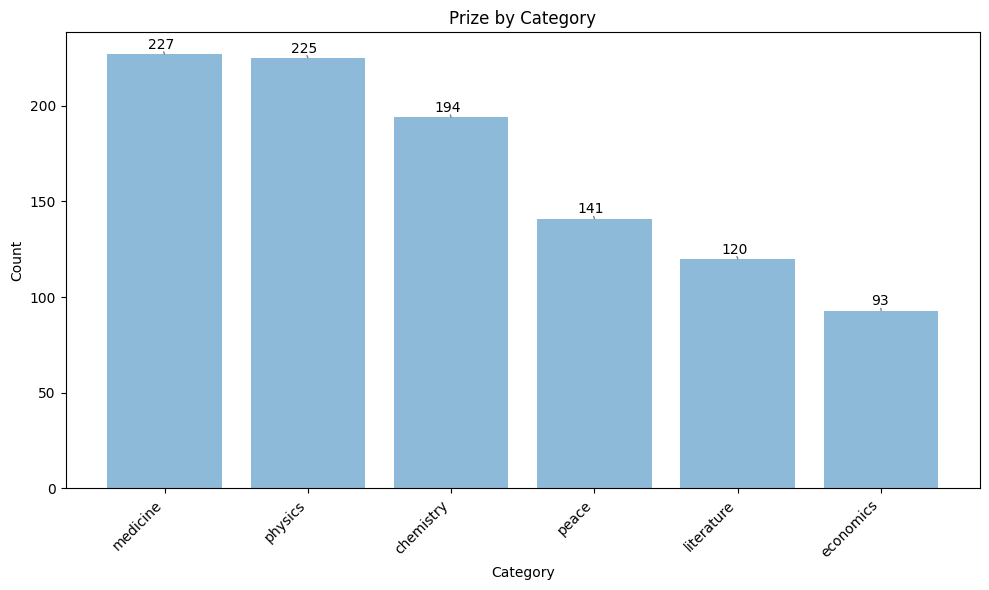

In [29]:
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Category'], df['Count'], alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Prize by Category')

# Adding count labels on top of bars
texts = [plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom') for bar in bars]

# Adjusting text labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

plt.tight_layout()
plt.show()

#### QUERY 2: COUNT OF MALE AND FEMALE LAUREATES

In [30]:
#1. Gender (count of male and female nobel prize winners)
cursor.execute('''
SELECT gender, COUNT(*) AS count
FROM Laureates
GROUP BY gender;
''')

# Fetch all results
results = cursor.fetchall()
        
# Convert the results into a DataFrame
df = pd.DataFrame(results, columns=['Gender', 'Count'])

# Display the DataFrame
print("Count of Male and Female Laureates")
df            

Count of Male and Female Laureates


,Gender,Count
0,female,64
1,male,901
2,org,27


#### Query 2: Visualisation 

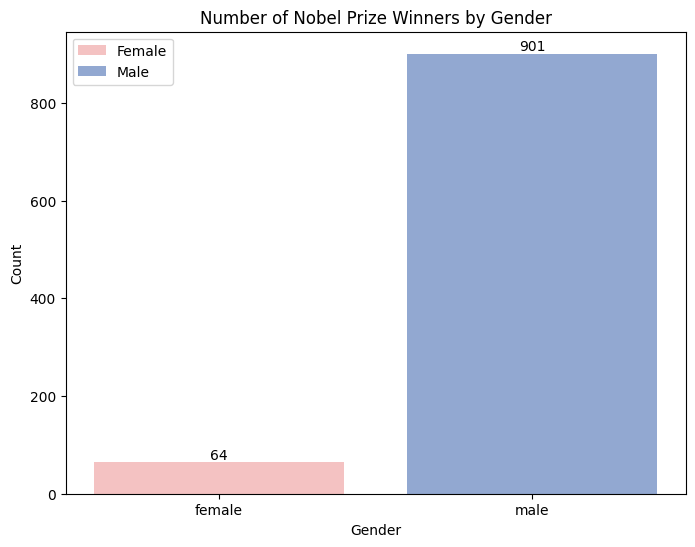

In [31]:
# Extracting data for plotting
filtered_results = [row for row in results if row[0] != 'org']
genders = [row[0] for row in filtered_results]
counts = [row[1] for row in filtered_results]

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(genders, counts, color=['#f4c2c2', '#92a8d1'])  # Assigning colors for female and male

# Adding legend
plt.legend(bars, ['Female', 'Male'])

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Nobel Prize Winners by Gender')
# Adding count numbers on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom', color='black')
plt.show()

#### QUERY 3: COUNT OF MALE AND FEMALE LAUREATES IN EACH CATEGORY

In [32]:
#2. Catergory and gender (count of male and female in each category nobel prize winners)

# Execute the SQL query
cursor.execute('''
SELECT category, gender, COUNT(*) AS count
FROM Prizes
JOIN Laureates
ON Prizes.laureate_id1 = Laureates.id
OR Prizes.laureate_id2 = Laureates.id
OR Prizes.laureate_id3 = Laureates.id
WHERE gender IS NOT NULL
GROUP BY category, gender''')

# Fetch all rows
results = cursor.fetchall()

# Create a DataFrame from the fetched rows
df = pd.DataFrame(results, columns=['Category', 'Gender', 'Count'])

# Filter out "org" category
df = df[df['Gender'] != 'org']

# Display the DataFrame
print("Count of Male and Female Laureates in each Category")
df          

Count of Male and Female Laureates in each Category


,Category,Gender,Count
0,chemistry,female,8
1,chemistry,male,186
2,economics,female,3
3,economics,male,90
4,literature,female,17
5,literature,male,103
6,medicine,female,13
7,medicine,male,214
8,peace,female,19
9,peace,male,92


#### Query 3: Visualisation 

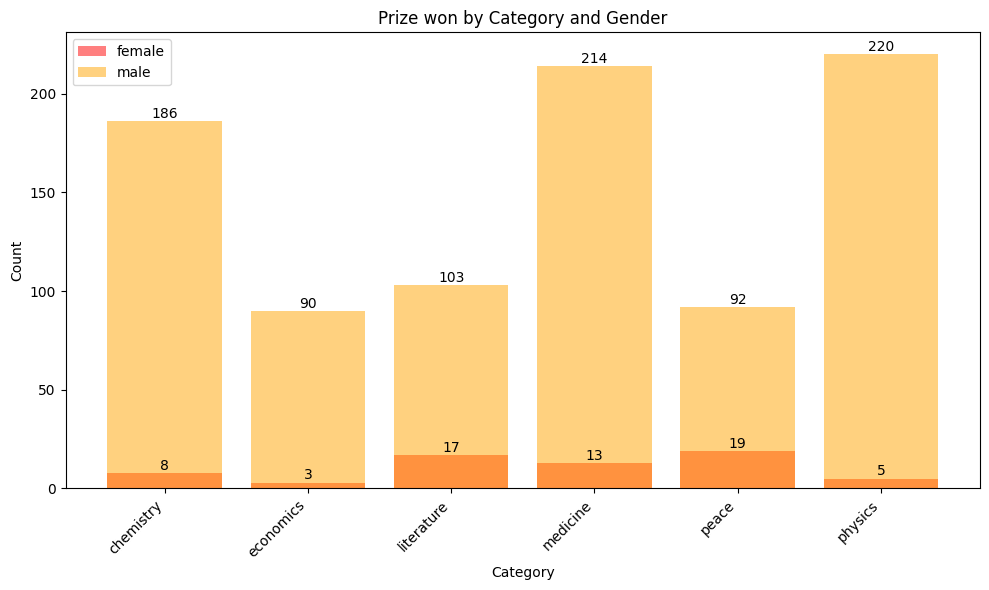

In [33]:
# Plotting
plt.figure(figsize=(10, 6))
colors = {'male': 'orange', 'female': 'red'}  # Define distinct colors for male and female
for gender in df['Gender'].unique():
    data = df[df['Gender'] == gender]
    plt.bar(data['Category'], 
            data['Count'], 
            label=gender, alpha=0.5, color=colors[gender])
    # Annotate bars with counts
    for i, count in enumerate(data['Count']):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Prize won by Category and Gender')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## GENDER PERSPECTIVES

#### QUERY 4: PERCENTAGE OF FEMALE LAUREATES OVER THE YEARS FOR EACH CATEGORY

In [34]:
#5. Percentage of female nobel prize winners year and category
# Execute the SQL query
cursor.execute('''
SELECT CAST((Year / 10) * 10 AS INTEGER) AS decade, Category,
       AVG(CASE WHEN gender = 'female' THEN 1 ELSE 0 END) AS fproportion
FROM (
    SELECT Year, Category, gender
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id1 = Laureates.id
                   OR Prizes.laureate_id2 = Laureates.id
                   OR Prizes.laureate_id3 = Laureates.id
)
GROUP BY decade, Category;
''')

# Fetch all rows
results = cursor.fetchall()
# Create a DataFrame from the fetched rows
df = pd.DataFrame(results, columns=['decade', 'Category', 'fproportion'])

# Filter for only female winners
df_female = df[df['fproportion'].notnull()]

# Display the DataFrame
print("Percentage of Female Winners by Decade and Category")
df_female  

Percentage of Female Winners by Decade and Category


,decade,Category,fproportion
0,1900,chemistry,0.000000
1,1900,literature,0.100000
2,1900,medicine,0.000000
3,1900,peace,0.071429
4,1900,physics,0.076923
...,...,...,...
67,2020,economics,0.111111
68,2020,literature,0.500000
69,2020,medicine,0.125000
70,2020,peace,0.285714


#### Query 4: Visualisation

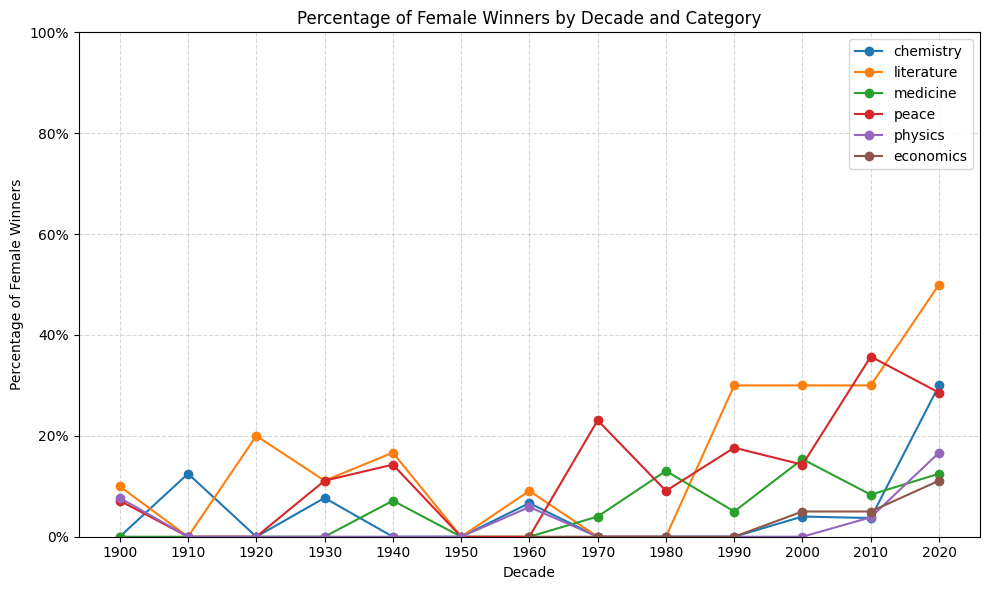

In [35]:


# Plotting
plt.figure(figsize=(10, 6))
for category in df_female['Category'].unique():
    data = df_female[df_female['Category'] == category]
    plt.plot(data['decade'], data['fproportion'], label=category, marker='o')
plt.xlabel('Decade')
plt.ylabel('Percentage of Female Winners')
plt.ylim(0, 1)
plt.xticks(range(1900, 2021, 10))
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.legend()
plt.title('Percentage of Female Winners by Decade and Category')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### QUERY 5: PERCENTAGE OF MALE LAUREATES OVER THE YEARS FOR EACH CATEGORY

In [36]:
#6. Percentage of male nobel prize winners year and category
# Execute the SQL query
cursor.execute('''
SELECT CAST((Year / 10) * 10 AS INTEGER) AS decade, Category,
       AVG(CASE WHEN gender = 'male' THEN 1 ELSE 0 END) AS mproportion
FROM (
    SELECT Year, Category, gender
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id1 = Laureates.id
                   OR Prizes.laureate_id2 = Laureates.id
                   OR Prizes.laureate_id3 = Laureates.id
)
GROUP BY decade, Category;
''')

# Fetch all rows
results = cursor.fetchall()
# Create a DataFrame from the fetched rows
df = pd.DataFrame(results, columns=['decade', 'Category', 'mproportion'])

# Filter for only female winners
df_male = df[df['mproportion'].notnull()]

# Display the DataFrame
print("Percentage of Male Winners by Decade and Category")
df_male  

Percentage of Male Winners by Decade and Category


,decade,Category,mproportion
0,1900,chemistry,1.000000
1,1900,literature,0.900000
2,1900,medicine,1.000000
3,1900,peace,0.857143
4,1900,physics,0.923077
...,...,...,...
67,2020,economics,0.888889
68,2020,literature,0.500000
69,2020,medicine,0.875000
70,2020,peace,0.285714


#### Query 5: Visualisation

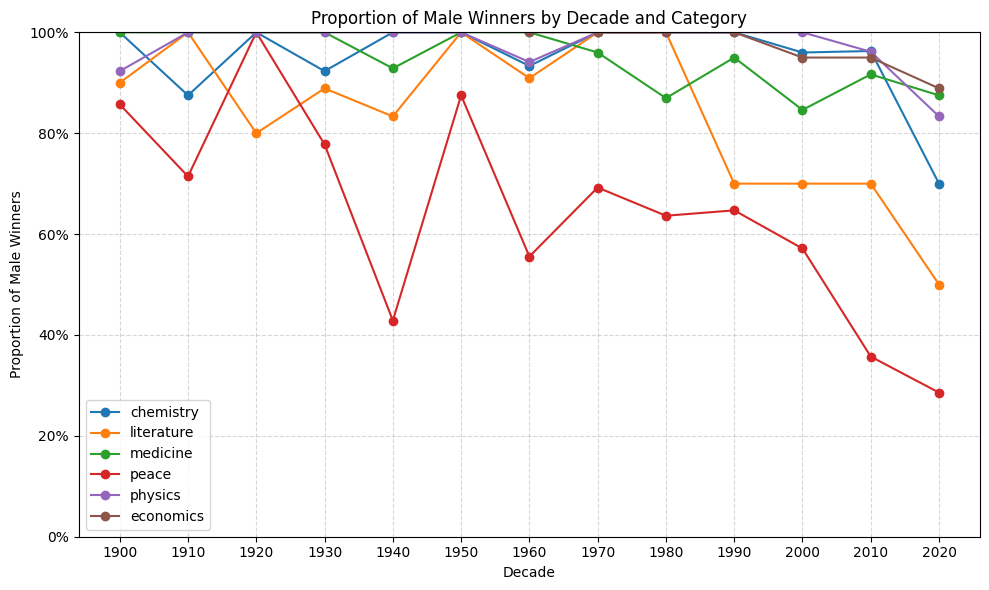

In [37]:
# Plotting
plt.figure(figsize=(10, 6))
for category in df_male['Category'].unique():
    data = df_male[df_male['Category'] == category]
    plt.plot(data['decade'], data['mproportion'], label=category, marker='o')
plt.xlabel('Decade')
plt.ylabel('Proportion of Male Winners')
plt.ylim(0, 1)
plt.xticks(range(1900, 2021, 10))
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.legend()
plt.title('Proportion of Male Winners by Decade and Category')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## SIGNIFICANT INDIVIDUAL ACHIEVEMENTS

#### QUERY 6: NUMBER OF LAUREATES WHO WON MORE THAN ONE NOBEL PRIZE

In [38]:
#4. No. of Laureates who won more than one nobel prize (Count of nobel prize winners(laureates) who have won more than one nobel prize)
cursor.execute('''
SELECT firstname, surname, prize_count
FROM (
    SELECT laureate_id, COUNT(*) AS prize_count
    FROM (
        SELECT laureate_id1 AS laureate_id
        FROM Prizes
        UNION ALL
        SELECT laureate_id2 AS laureate_id
        FROM Prizes
        UNION ALL
        SELECT laureate_id3 AS laureate_id
        FROM Prizes
    ) AS laureate_prizes
    GROUP BY laureate_id
    HAVING prize_count > 1
) AS multi_winners
JOIN Laureates ON multi_winners.laureate_id = Laureates.id
''')

# Fetch all rows
results = cursor.fetchall()

#### Query 6: Dataframe

In [39]:
columns = ["firstname", "surname", "prize_count"]

# Create DataFrame from the rows fetched
df = pd.DataFrame(results, columns=columns)

# Print the DataFrame
print("Laureates who won more than one Nobel Prize:")
df

Laureates who won more than one Nobel Prize:


,firstname,surname,prize_count
0,Marie,Curie,2
1,John,Bardeen,2
2,Linus,Pauling,2
3,Frederick,Sanger,2
4,International Committee of the Red Cross,None,3
5,Office of the United Nations High Commissioner...,None,2
6,Barry,Sharpless,2


#### QUERY 7: YOUNGEST NOBEL LAUREATES AGE, NAME, CATEGORY AND YEAR THEY WON NOBEL PRIZE

In [40]:
#7 Youngest Nobel Laureates(Age,Name,Year they won nobel prize and category)

# Execute a query to select laureates whose age is less than 32 when they won the Nobel Prize
cursor.execute('''
    SELECT Age_Laureate1 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id1 = Laureates.id
    WHERE Age_Laureate1 IS NOT NULL AND Age_Laureate1 < 32 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
    UNION
    SELECT Age_Laureate2 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id2 = Laureates.id
    WHERE Age_Laureate2 IS NOT NULL AND Age_Laureate2 < 32 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
    UNION
    SELECT Age_Laureate3 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id3 = Laureates.id
    WHERE Age_Laureate3 IS NOT NULL AND Age_Laureate3 < 32 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
''')

# Fetch and print the results
results = cursor.fetchall()


#### Query 7: Dataframe

In [41]:
# Create a DataFrame from the fetched rows
df = pd.DataFrame(results, columns=['Age', 'Full Name', 'Year', 'Category'])
# Print the DataFrame
df

,Age,Full Name,Year,Category
0,17,Malala Yousafzai,2014,peace
1,25,Lawrence Bragg,1915,physics
2,31,Carl D. Anderson,1936,physics
3,31,Paul A.M. Dirac,1933,physics
4,31,Tsung-Dao Lee,1957,physics
5,31,Werner Heisenberg,1932,physics


#### QUERY 8: OLDEST NOBEL LAUREATES AGE, NAME, CATEGORY AND YEAR THEY WON NOBEL PRIZE

In [42]:
#8 Oldest Nobel Laureates(Age,Name,Year they won nobel prize and category)

# Execute a query to select laureates whose age is greater than 85 when they won the Nobel Prize
cursor.execute('''
    SELECT Age_Laureate1 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id1 = Laureates.id
    WHERE Age_Laureate1 IS NOT NULL AND Age_Laureate1 > 85 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
    UNION
    SELECT Age_Laureate2 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id2 = Laureates.id
    WHERE Age_Laureate2 IS NOT NULL AND Age_Laureate2 > 85 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
    UNION
    SELECT Age_Laureate3 AS Age, 
           CASE WHEN firstname IS NOT NULL THEN firstname ELSE '' END || ' ' || 
           CASE WHEN surname IS NOT NULL THEN surname ELSE '' END AS Full_Name, 
           Prizes.year, 
           Prizes.category
    FROM Prizes
    JOIN Laureates ON Prizes.laureate_id3 = Laureates.id
    WHERE Age_Laureate3 IS NOT NULL AND Age_Laureate3 > 85 AND 
          firstname IS NOT NULL AND surname IS NOT NULL
''')

# Fetch and print the results
results = cursor.fetchall()

#### Query 8: Dataframe

In [43]:
# Create a DataFrame from the fetched rows
df = pd.DataFrame(results, columns=['Age', 'Full Name', 'Year', 'Category'])
# Print the DataFrame
df

,Age,Full Name,Year,Category
0,86,Ferdinand Buisson,1927,peace
1,87,Joseph Rotblat,1995,peace
2,87,Karl von Frisch,1973,medicine
3,87,Peyton Rous,1966,medicine
4,87,Vitaly L. Ginzburg,2003,physics
5,87,Yoichiro Nambu,2008,physics
6,88,Doris Lessing,2007,literature
7,88,Raymond Davis Jr.,2002,physics
8,89,Lloyd S. Shapley,2012,economics
9,89,Roger Penrose,2020,physics


#### QUERY 9: FIRST FEMALE LAUREATES AGE, NAME, CATEGORY AND YEAR THEY WON NOBEL PRIZE

In [44]:
#9 First Female Laureates(Age,Name,Year they won nobel prize and category)

# Execute a query to select the first female laureates for each category
cursor.execute('''
    SELECT MIN(p.year) AS Year,
           l.firstname || ' ' || l.surname AS Full_Name,
           p.category AS Category,
           l.bornCountry AS Birth_Country
    FROM Prizes p
    JOIN Laureates l ON (p.laureate_id1 = l.id OR p.laureate_id2 = l.id OR p.laureate_id3 = l.id)
    WHERE l.gender = 'female'
    GROUP BY p.category
    ORDER BY MIN(p.year) ASC
''')

# Fetch and print the result
results = cursor.fetchall()

#### Query 9: Dataframe 

In [45]:
# Create a DataFrame from the fetched rows
df = pd.DataFrame(results, columns=['Year', 'Full Name', 'Category', 'Birth Country'])
# Print the DataFrame
df

,Year,Full Name,Category,Birth Country
0,1903,Marie Curie,physics,Russian Empire (now Poland)
1,1905,Bertha von Suttner,peace,Austrian Empire (now Czech Republic)
2,1909,Selma Lagerlöf,literature,Sweden
3,1911,Marie Curie,chemistry,Russian Empire (now Poland)
4,1947,Gerty Cori,medicine,Austria-Hungary (now Czech Republic)
5,2009,Elinor Ostrom,economics,USA


## GEOGRAPHICAL DISTRIBUTION OF AWARDS

#### QUERY 10: TOP 10 COUNTRIES WITH THE MOST NOBEL PRIZES BY BIRTH COUNTRY OF LAUREATES

In [46]:
#10 Country that won most nobel prize (by birth country of laureates)

#(Alternative query need to check the output)
cursor.execute('''
SELECT L.bornCountry AS Birth_Country, COUNT(*) AS Prize_Count
FROM Prizes AS P
JOIN 
Laureates AS L ON L.id IN (P.laureate_id1, P.laureate_id2, P.laureate_id3) 
WHERE L.bornCountry IS NOT NULL
GROUP BY L.bornCountry
ORDER BY Prize_Count DESC
LIMIT 10

''')

# Fetch and print the result
results = cursor.fetchall()
# Assuming 'rows' contains the fetched results from the database query
df = pd.DataFrame(results, columns=['Birth Country', 'Prize Count'])
# Sort the DataFrame for better visualization
df.sort_values('Prize Count', ascending=False, inplace=True)

df

,Birth Country,Prize Count
0,USA,292
1,United Kingdom,90
2,Germany,67
3,France,58
4,Sweden,30
5,Japan,28
6,Canada,21
7,the Netherlands,19
8,Switzerland,19
9,Russia,18


#### Query 10: Visualisation 

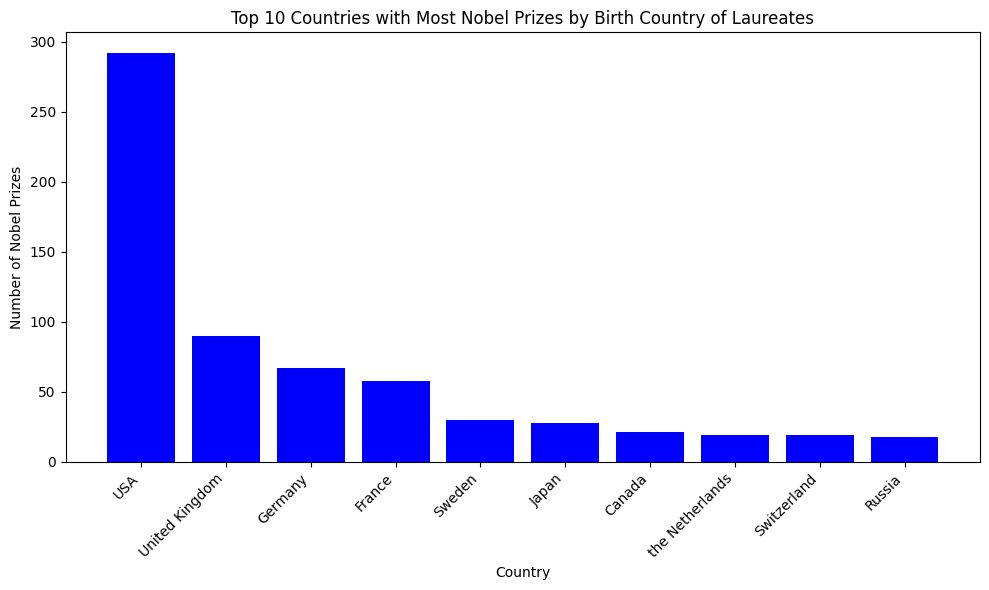

In [47]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Customize the size of the figure
plt.bar(df['Birth Country'], df['Prize Count'], color='blue')
plt.xlabel('Country')  # X-axis label
plt.ylabel('Number of Nobel Prizes')  # Y-axis label
plt.title('Top 10 Countries with Most Nobel Prizes by Birth Country of Laureates')  # Chart title
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

#### QUERY 11: TOP 10 BIRTH CITY OF LAUREATES

In [48]:
#14 Top 10 Birth City of Nobel laureates
cursor.execute('''
SELECT L.bornCity AS Birth_City, COUNT(*) AS Prize_Count
FROM Prizes AS P
JOIN 
Laureates AS L ON L.id IN (P.laureate_id1, P.laureate_id2, P.laureate_id3) 
WHERE L.bornCity IS NOT NULL
GROUP BY L.bornCity
ORDER BY Prize_Count DESC
LIMIT 10

''')

# Fetch and print the result
results = cursor.fetchall()
# Assuming 'rows' contains the fetched results from the database query
df = pd.DataFrame(results, columns=['Birth City', 'Prize Count'])

# Sort the DataFrame for better visualization
df.sort_values('Prize Count', ascending=True, inplace=True)
df

,Birth City,Prize Count
7,"Washington, D.C.",8
8,Budapest,8
9,"Brooklyn, NY",8
6,"Boston, MA",9
5,Berlin,11
4,"Chicago, IL",13
3,Vienna,14
2,London,19
1,Paris,28
0,"New York, NY",55


#### Query 11: Visualisation 

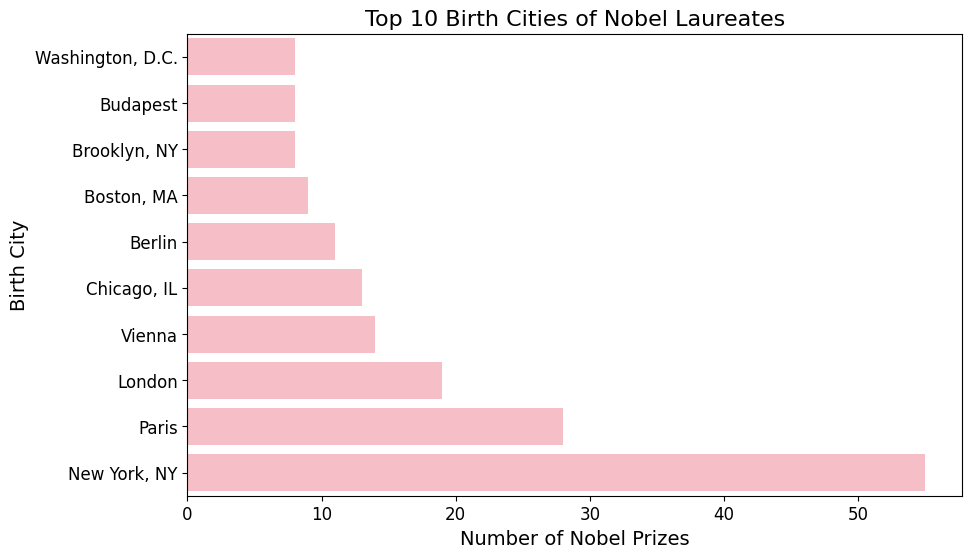

In [49]:
# Start plotting
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.barplot(x='Prize Count', y='Birth City', data=df, color='lightpink')

# Adding titles and labels
plt.title('Top 10 Birth Cities of Nobel Laureates', fontsize=16)
plt.xlabel('Number of Nobel Prizes', fontsize=14)
plt.ylabel('Birth City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

#### QUERY 12: TOP 10 COUNTRIES THAT WON NOBEL PRIZES FOR PEACE

In [50]:
# 11 Top 10 Countries that won Nobel Prizes for Peace

cursor.execute('''
SELECT  L.bornCountry AS region,
COUNT(*) AS value
FROM Prizes AS P
JOIN     
Laureates AS L ON L.id IN (P.laureate_id1, P.laureate_id2, P.laureate_id3)
WHERE P.category = 'peace'
 AND L.bornCountry IS NOT NULL    
AND L.bornCountry != ''
GROUP BY  L.bornCountry
ORDER BY  value DESC
LIMIT 10

''')

# Fetch all rows
results = cursor.fetchall()

# Assuming 'rows' contains the fetched results from the database query
df = pd.DataFrame(results, columns=['Country', 'Nobel Peace Prizes'])

# Sort the DataFrame for a better visualization
df.sort_values('Nobel Peace Prizes', ascending=True, inplace=True)
df

,Country,Nobel Peace Prizes
6,Switzerland,3
7,South Africa,3
8,Egypt,3
9,Belgium,3
5,Northern Ireland,4
2,United Kingdom,5
3,Sweden,5
4,Germany,5
1,France,9
0,USA,19


#### Query 12: Visualisation 

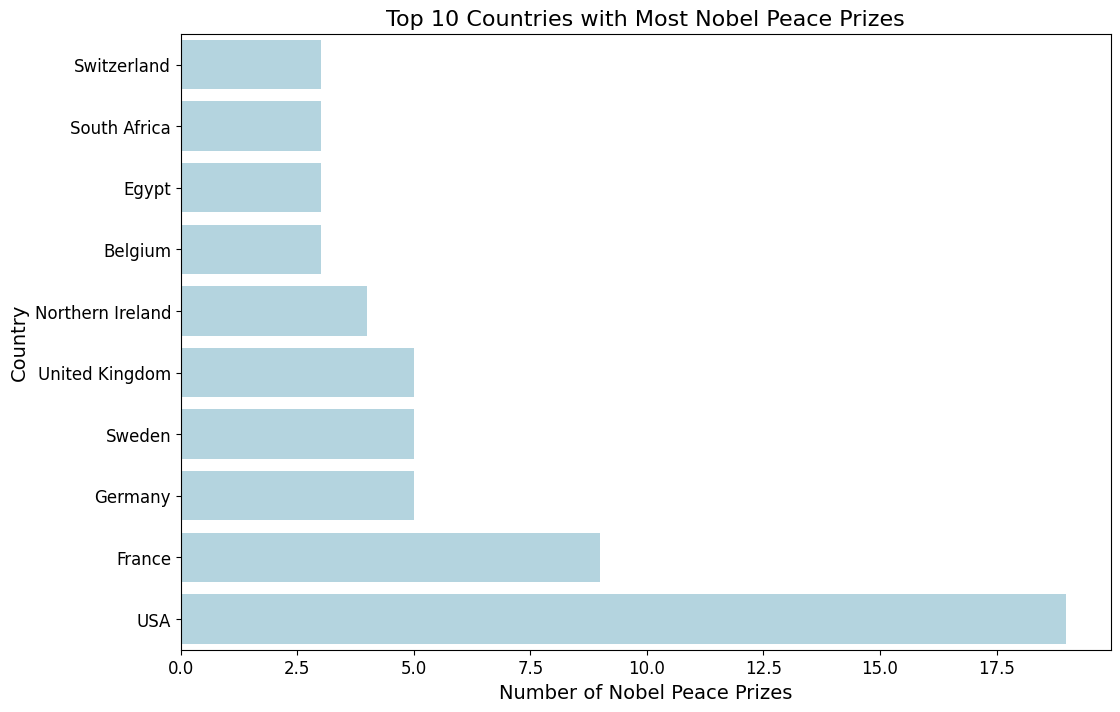

In [51]:
# Start plotting
plt.figure(figsize=(12, 8))  # Set the figure size for the plot
sns.barplot(x='Nobel Peace Prizes', y='Country', data=df, color='lightblue')

# Adding titles and labels
plt.title('Top 10 Countries with Most Nobel Peace Prizes', fontsize=16)
plt.xlabel('Number of Nobel Peace Prizes', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

#### QUERY 13: TOP 10 COUNTRIES WHO GOT NOBEL PRIZE FOR MEDICINE

In [52]:
# 12 Top 10 Countries that won Nobel Prizes for Medicine

cursor.execute('''
SELECT  L.bornCountry AS region,
COUNT(*) AS value
FROM Prizes AS P
JOIN     
Laureates AS L ON L.id IN (P.laureate_id1, P.laureate_id2, P.laureate_id3)
WHERE P.category = 'medicine'
 AND L.bornCountry IS NOT NULL    
AND L.bornCountry != ''
GROUP BY  L.bornCountry
ORDER BY  value DESC
LIMIT 10;
''')

# Fetch all rows
results = cursor.fetchall()

# Assuming 'rows' contains the fetched results from the database query
df = pd.DataFrame(results, columns=['Country', 'Nobel Prizes for Medicine'])

# Sort the DataFrame for better visualization
df.sort_values('Nobel Prizes for Medicine', ascending=False, inplace=True)
df

,Country,Nobel Prizes for Medicine
0,USA,80
1,United Kingdom,25
2,Germany,16
3,France,12
4,Sweden,8
5,Australia,7
6,Switzerland,6
7,Japan,5
8,Italy,5
9,Austria,5


#### Query 13: Visualisation 

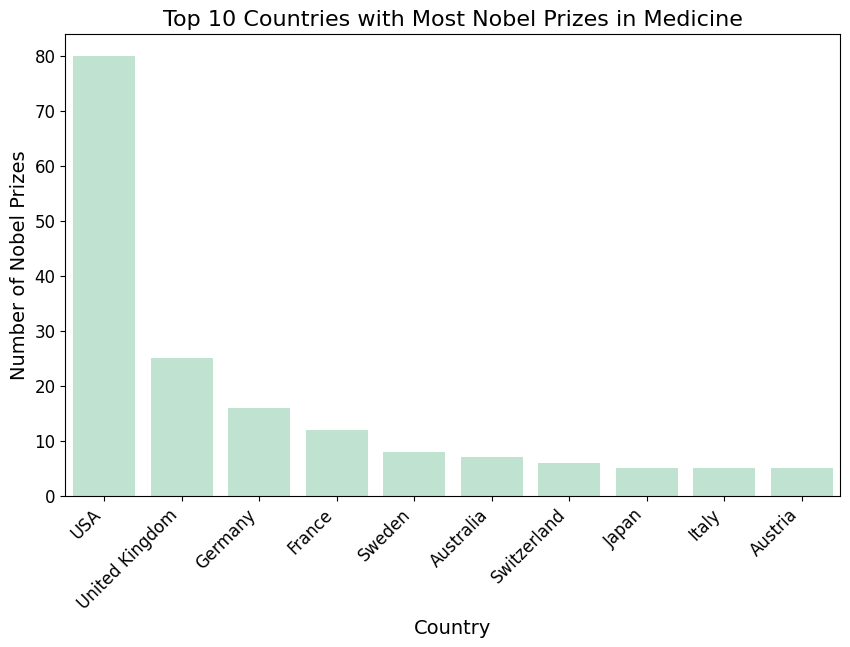

In [53]:
# Start plotting
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.barplot(x='Country', y='Nobel Prizes for Medicine', data=df, color='#bae8d1')

# Adding titles and labels
plt.title('Top 10 Countries with Most Nobel Prizes in Medicine', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Nobel Prizes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate country names for better readability
plt.yticks(fontsize=12)

# Display the plot
plt.show()

## INSTITUTIONAL AND GEOGRAPHIC IMPACT

#### QUERY 14: TOP 10 AFFILIATED ORGANIZATIONS THAT WON NOBEL PRIZES

In [54]:
# SQL Query to find the top 10 affiliations based on the number of Nobel Prizes
query = """
SELECT affiliation_name, COUNT(*) AS prize_count
FROM (
SELECT laureate_id1_affiliation_name AS affiliation_name    
FROM Prizes    
WHERE laureate_id1_affiliation_name IS NOT NULL AND          
TRIM(laureate_id1_affiliation_name) != '' AND          
laureate_id1_affiliation_name NOT IN ('None', 'Unknown')    
UNION ALL    
SELECT laureate_id2_affiliation_name AS affiliation_name    
FROM Prizes    
WHERE laureate_id2_affiliation_name IS NOT NULL AND          
TRIM(laureate_id2_affiliation_name) != '' AND          
laureate_id2_affiliation_name NOT IN ('None', 'Unknown')    
UNION ALL    
SELECT laureate_id3_affiliation_name AS affiliation_name    
FROM Prizes    
WHERE laureate_id3_affiliation_name IS NOT NULL AND          
TRIM(laureate_id3_affiliation_name) != '' AND          
laureate_id3_affiliation_name NOT IN ('None', 'Unknown')
) AS combined
GROUP BY affiliation_name
ORDER BY prize_count DESC
LIMIT 10
"""
cursor.execute(query)
results = cursor.fetchall()

#### Query 14: Visualisation Dataframe

In [55]:

# Convert the query results to a DataFrame
df = pd.DataFrame(results, columns=['Affiliation Name', 'Prize Count'])

# Print the DataFrame
print("Top 10 Affiliations by Nobel Prizes:")
df

Top 10 Affiliations by Nobel Prizes:


,Affiliation Name,Prize Count
0,University of California,36
1,Harvard University,28
2,Massachusetts Institute of Technology (MIT),23
3,Stanford University,22
4,University of Chicago,19
5,California Institute of Technology (Caltech),19
6,University of Cambridge,18
7,Columbia University,18
8,Princeton University,17
9,Rockefeller University,13


#### QUERY 15: TOP 10 CITIES OF THE AFFILIATIONS THAT WON THE MOST NOBEL PRIZES

In [56]:
# SQL query to find the top 10 cities with the most Nobel Prizes
query = """
SELECT
    affiliation_city,
    COUNT(*) AS prize_count
FROM (
    SELECT laureate_id1_affiliation_city AS affiliation_city
    FROM Prizes
    WHERE laureate_id1_affiliation_city IS NOT NULL AND TRIM(laureate_id1_affiliation_city) != '' AND laureate_id1_affiliation_city NOT IN ('None', 'Unknown')

    UNION ALL

    SELECT laureate_id2_affiliation_city
    FROM Prizes
    WHERE laureate_id2_affiliation_city IS NOT NULL AND TRIM(laureate_id2_affiliation_city) != '' AND laureate_id2_affiliation_city NOT IN ('None', 'Unknown')

    UNION ALL

    SELECT laureate_id3_affiliation_city
    FROM Prizes
    WHERE laureate_id3_affiliation_city IS NOT NULL AND TRIM(laureate_id3_affiliation_city) != '' AND laureate_id3_affiliation_city NOT IN ('None', 'Unknown')
) AS cities
GROUP BY affiliation_city
ORDER BY prize_count DESC
LIMIT 10;
"""

# Execute the query
cursor.execute(query)
results = cursor.fetchall()

#### Query 15: Visualisation Dataframe

In [57]:
# Convert the results into a DataFrame
df = pd.DataFrame(results, columns=['City', 'Prize Count'])

# Display the DataFrame
print("Top 10 Affiliation Cities by Nobel Prizes:")
df

Top 10 Affiliation Cities by Nobel Prizes:


,City,Prize Count
0,"Cambridge, MA",54
1,"New York, NY",45
2,Cambridge,31
3,Paris,27
4,London,27
5,"Stanford, CA",26
6,"Princeton, NJ",21
7,"Chicago, IL",21
8,"Berkeley, CA",21
9,"Pasadena, CA",19
